In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [144]:
year_data = data_df.sort_values('work_year')
#year_data["salary_in_usd"] = year_data["salary_in_usd"].map("${:,.0f}".format)
reduced_df = year_data[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
renamed_df = renamed_df = reduced_df.rename(columns={"work_year":"Work Year", "experience_level":"Experience Level", "employment_type": "Employment Type", "job_title":"Job Title",
                                                     "salary_in_usd": "Salary (USD)", "employee_residence": "Employee Residence (Country)", "remote_ratio": "Remote Ratio", 
                                                     "company_location": "Location of Company", "company_size": "Company Size"
                                                
                                                     }).sort_values('Work Year')
location_filter = renamed_df['Location of Company'].value_counts()
clean_df = renamed_df[renamed_df['Location of Company'].isin(location_filter[location_filter > 25].index)]
clean_df

,Work Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Ratio,Location of Company,Company Size
14837,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
14694,2020,MI,FT,Data Scientist,38776,ES,100,ES,M
12275,2020,MI,FT,Lead Data Analyst,87000,US,100,US,L
14164,2020,MI,FT,Data Engineer,59303,DE,100,DE,S
11490,2020,SE,FT,Big Data Engineer,114047,PL,100,GB,S
...,...,...,...,...,...,...,...,...,...
14602,2024,EN,FT,Data Science,37120,US,0,US,M
14603,2024,MI,FT,Data Engineer,46250,GB,100,GB,M
6472,2024,SE,FT,Data Scientist,151000,US,0,US,M
14581,2024,MI,FT,Data Science,47850,GB,0,GB,M


In [145]:
avg_salary_by_remote_ratio_df = clean_df.groupby('Remote Ratio')['Salary (USD)'].mean().reset_index().round(2)

# Displaying the results
avg_salary_by_remote_ratio_df

,Remote Ratio,Salary (USD)
0,0,154920.22
1,50,88079.80
2,100,147470.07


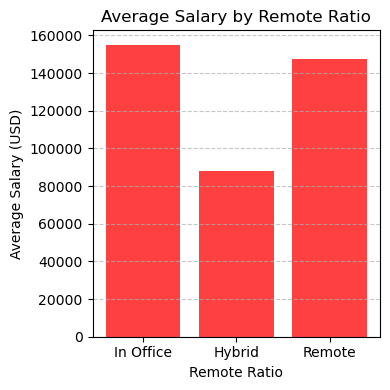

In [146]:
label_mapping = {0: "In Office", 50: "Hybrid", 100: "Remote"}
avg_salary_by_remote_ratio_df["Remote Ratio"] = avg_salary_by_remote_ratio_df["Remote Ratio"].map(label_mapping)

x_axis = np.arange(len(avg_salary_by_remote_ratio_df))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(4, 4))
plt.bar(x_axis, avg_salary_by_remote_ratio_df["Salary (USD)"], color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, avg_salary_by_remote_ratio_df["Remote Ratio"], rotation="horizontal")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Remote Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Overall, the dataset proves that non-remote jobs, on average, offer a higher salary incentive than remote jobs

In [147]:
work_year_counts = clean_df['Work Year'].value_counts()

# Display the counts
print(work_year_counts)


Work Year
2023    8374
2024    4282
2022    1585
2021     176
2020      59
Name: count, dtype: int64


In [148]:
average_salaries_per_year = clean_df.groupby('Work Year')['Salary (USD)'].mean()

# Display the average salaries per year
print(round(average_salaries_per_year))

Work Year
2020    109978.0
2021    108726.0
2022    136952.0
2023    155121.0
2024    152847.0
Name: Salary (USD), dtype: float64


In [149]:
location_counts = clean_df['Location of Company'].value_counts()

# Display the counts
print(location_counts)

Location of Company
US    12975
GB      655
CA      392
ES      127
DE       98
FR       61
IN       59
AU       53
PT       28
NL       28
Name: count, dtype: int64


C:\Users\chadh\AppData\Local\Temp\ipykernel_17836\1202282740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Remote Ratio Label'] = clean_df['Remote Ratio'].map(label_map)


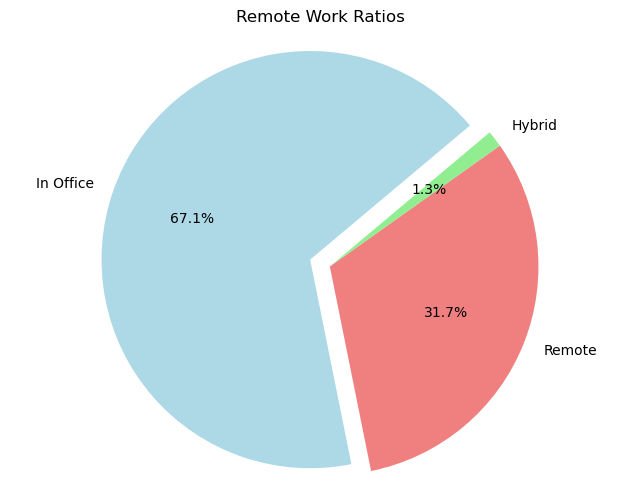

In [150]:



label_map = {100: 'Remote', 50: 'Hybrid', 0: 'In Office'}
clean_df['Remote Ratio Label'] = clean_df['Remote Ratio'].map(label_map)

remote_ratio_counts = clean_df['Remote Ratio Label'].value_counts()

explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(remote_ratio_counts, explode=explode, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=40, colors=['lightblue','lightcoral','lightgreen'])
plt.title('Remote Work Ratios')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

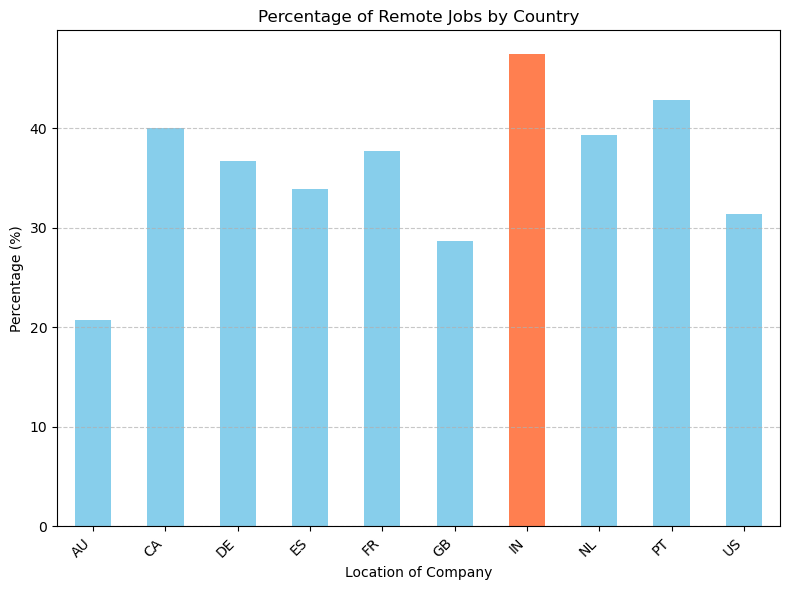

In [151]:
remote_ratio_counts = clean_df.groupby('Location of Company')['Remote Ratio'].value_counts().unstack()

# Display the result

total_counts = remote_ratio_counts.sum(axis=1)

# Calculate the percentage of the total represented by '100' counts
percentage_100_counts = (remote_ratio_counts[100] / total_counts) * 100

# Display the result
plt.figure(figsize=(8, 6))
percentage_100_counts.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Percentage of Remote Jobs by Country')
plt.xlabel('Location of Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

colors = ['skyblue'] * len(percentage_100_counts)
max_index = percentage_100_counts.idxmax()
colors[percentage_100_counts.index.get_loc(max_index)] = 'coral'  # Change color of the highest value bar

# Display the plot
plt.tight_layout()
plt.show()


Based on the dataset given, Indian companies on average offer the most remote oppportunities for work, while Australian companies on averagfe offer the fewest remote oppportunities

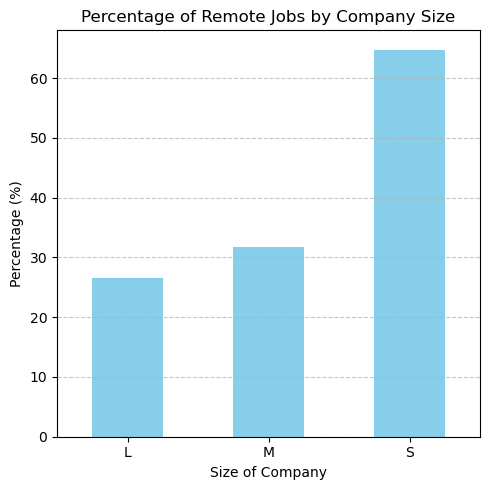

In [152]:
remote_ratio_counts = clean_df.groupby('Company Size')['Remote Ratio'].value_counts().unstack()

# Display the result

total_counts = remote_ratio_counts.sum(axis=1)

# Calculate the percentage of the total represented by '100' counts
percentage_100_counts = (remote_ratio_counts[100] / total_counts) * 100

# Display the result
plt.figure(figsize=(5, 5))
percentage_100_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Percentage of Remote Jobs by Company Size')
plt.xlabel('Size of Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = "horizontal")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Based on the analysis of this dataset, remote job opportunities appear to be more available from smaller companies